# Big Sales prediction using Random Forest

# Import Library


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import Data

In [2]:
df =  pd.read_csv(r'https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/Big%20Sales%20Data.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDT36,12.3,Low Fat,0.111448,Baking Goods,33.4874,OUT049,1999,Medium,Tier 1,Supermarket Type1,436.608721
1,FDT36,12.3,Low Fat,0.111904,Baking Goods,33.9874,OUT017,2007,Medium,Tier 2,Supermarket Type1,443.127721
2,FDT36,12.3,LF,0.111728,Baking Goods,33.9874,OUT018,2009,Medium,Tier 3,Supermarket Type2,564.598400
3,FDT36,12.3,Low Fat,0.000000,Baking Goods,34.3874,OUT019,1985,Small,Tier 1,Grocery Store,1719.370000
4,FDP12,9.8,Regular,0.045523,Baking Goods,35.0874,OUT017,2007,Medium,Tier 2,Supermarket Type1,352.874000


# Information of DataFrame

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11815 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [4]:
df.shape

(14204, 12)

In [5]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [6]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11815.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,12.788355,0.065953,141.004977,1997.830681,2185.836320
std,4.654126,0.051459,62.086938,8.371664,1827.479550
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,922.135101
50%,12.500000,0.054021,142.247000,1999.000000,1768.287680
75%,16.750000,0.094037,185.855600,2004.000000,2988.110400
max,30.000000,0.328391,266.888400,2009.000000,31224.726950


# Treating Missing Values

In [7]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2389
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
item_weight_mean = df['Item_Weight'].mean()
item_weight_mean

12.788355480322409

In [9]:
df['Item_Weight'].fillna(item_weight_mean,inplace=True)

In [10]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

# Data Cleaning

In [11]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [12]:
df['Item_Fat_Content'].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [13]:
df.replace({'Item_Fat_Content':{'reg':'Regular','low fat':'Low Fat','LF':'Low Fat'}},inplace=True)

In [14]:
df['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [15]:
df['Item_Fat_Content'].replace({'Low Fat':0,'Regular':1},inplace=True)

In [16]:
df['Item_Fat_Content'].value_counts()

0    9185
1    5019
Name: Item_Fat_Content, dtype: int64

In [17]:
df['Item_Type'].value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

In [18]:
df['Item_Type'].replace({'Fruits and Vegetables':0,'Snack Foods':0,'Household':1,'Frozen Foods':0,'Dairy':0,'Baking Goods':0,'Canned':0,'Health and Hygiene':1,'Meat':0,'Soft Drinks':0,'Breads':0,'Hard Drinks':0,'Others':2,'Starchy Foods':0,'Breakfast':0,'Seafood':0},inplace=True)

In [19]:
df['Item_Type'].value_counts()

0    11518
1     2406
2      280
Name: Item_Type, dtype: int64

In [20]:
df['Outlet_Identifier'].value_counts()

OUT027    1559
OUT013    1553
OUT049    1550
OUT046    1550
OUT035    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64

In [22]:
from  sklearn.preprocessing import LabelEncoder

In [24]:
labelencoder=LabelEncoder()

In [26]:
df['Outlet_Identifier'] = labelencoder.fit_transform(df['Outlet_Identifier'])

In [27]:
df['Outlet_Identifier'].value_counts()

5    1559
1    1553
9    1550
8    1550
6    1550
7    1548
3    1546
2    1543
0     925
4     880
Name: Outlet_Identifier, dtype: int64

In [28]:
df['Outlet_Size'].value_counts()

Medium    7122
Small     5529
High      1553
Name: Outlet_Size, dtype: int64

In [31]:
df['Outlet_Size'] = df['Outlet_Size'].map({'Small':0,'Medium':1,'High':2})

In [32]:
df['Outlet_Size'].value_counts()

1    7122
0    5529
2    1553
Name: Outlet_Size, dtype: int64

In [34]:
df['Outlet_Location_Type'].value_counts()

Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

In [35]:
df['Outlet_Location_Type'] = df['Outlet_Location_Type'].map({'Tier 1':0,'Tier 2':1,'Tier 3':2})

In [36]:
df['Outlet_Location_Type'].value_counts()

2    5583
1    4641
0    3980
Name: Outlet_Location_Type, dtype: int64

In [37]:
df['Outlet_Type'].value_counts()

Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64

In [39]:
df['Outlet_Type'] = labelencoder.fit_transform(df['Outlet_Type'])

In [40]:
df['Outlet_Type'].value_counts()

1    9294
0    1805
3    1559
2    1546
Name: Outlet_Type, dtype: int64

In [41]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDT36,12.3,0,0.111448,0,33.4874,9,1999,1,0,1,436.608721
1,FDT36,12.3,0,0.111904,0,33.9874,2,2007,1,1,1,443.127721
2,FDT36,12.3,0,0.111728,0,33.9874,3,2009,1,2,2,564.598400
3,FDT36,12.3,0,0.000000,0,34.3874,4,1985,0,0,0,1719.370000
4,FDP12,9.8,1,0.045523,0,35.0874,2,2007,1,1,1,352.874000


# Visulaization

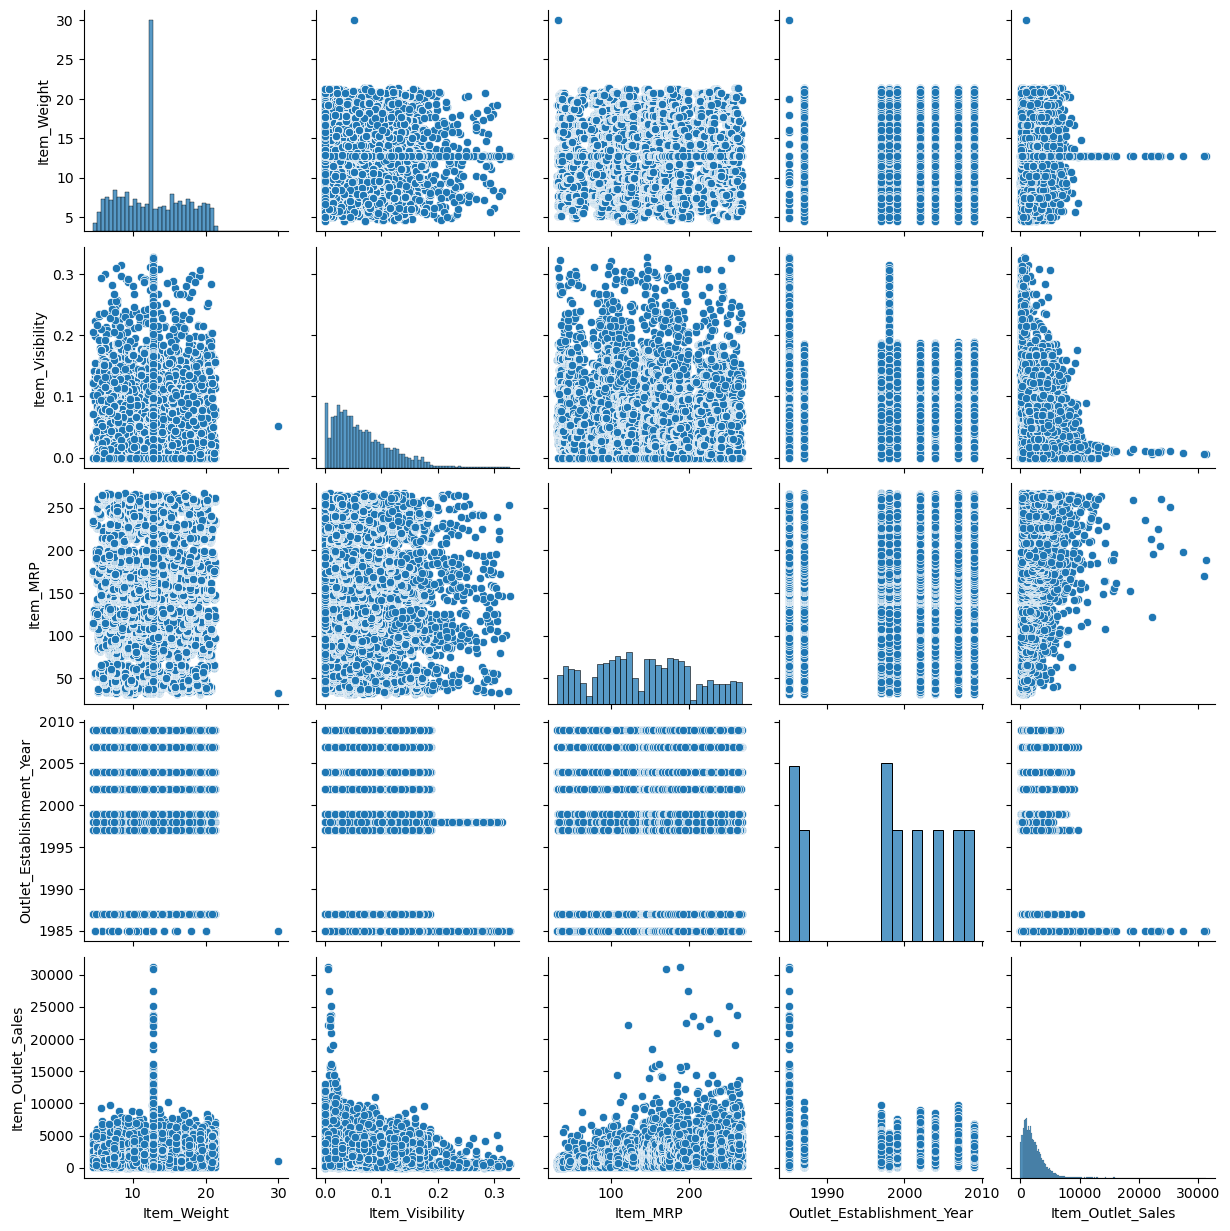

In [16]:
sns.pairplot(df)

# Defining X and y Variables

In [42]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDT36,12.3,0,0.111448,0,33.4874,9,1999,1,0,1,436.608721
1,FDT36,12.3,0,0.111904,0,33.9874,2,2007,1,1,1,443.127721
2,FDT36,12.3,0,0.111728,0,33.9874,3,2009,1,2,2,564.598400
3,FDT36,12.3,0,0.000000,0,34.3874,4,1985,0,0,0,1719.370000
4,FDP12,9.8,1,0.045523,0,35.0874,2,2007,1,1,1,352.874000


In [43]:
y=df['Item_Outlet_Sales']

In [44]:
y

0         436.608721
1         443.127721
2         564.598400
3        1719.370000
4         352.874000
            ...     
14199    4984.178800
14200    2885.577200
14201    2885.577200
14202    3803.676434
14203    3644.354765
Name: Item_Outlet_Sales, Length: 14204, dtype: float64

In [50]:
y.shape

(14204,)

In [46]:
X=df[['Item_Weight','Item_Fat_Content','Item_Visibility', 'Item_Type', 'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']]

In [49]:
X.shape

(14204, 10)

# Standardization

In [51]:
from sklearn.preprocessing import StandardScaler

In [52]:
ss = StandardScaler()

In [61]:
X = ss.fit_transform(X)

In [62]:
X

array([[-1.15054807e-01, -7.39212016e-01,  8.84136348e-01, ...,
         4.31806361e-01, -1.36928630e+00, -2.52702417e-01],
       [-1.15054807e-01, -7.39212016e-01,  8.93006160e-01, ...,
         4.31806361e-01, -1.38860375e-01, -2.52702417e-01],
       [-1.15054807e-01, -7.39212016e-01,  8.89583307e-01, ...,
         4.31806361e-01,  1.09156555e+00,  1.00276633e+00],
       ...,
       [ 2.74340724e-03, -7.39212016e-01,  7.01195189e-02, ...,
         1.97440635e+00,  1.09156555e+00, -2.52702417e-01],
       [ 1.53512683e-13, -7.39212016e-01,  6.46936649e-02, ...,
         4.31806361e-01,  1.09156555e+00,  2.25823507e+00],
       [ 2.74340724e-03, -7.39212016e-01,  7.33489085e-02, ...,
         4.31806361e-01, -1.36928630e+00, -2.52702417e-01]])

# Train test Split

In [59]:
from sklearn.model_selection import train_test_split

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1,random_state = 2529)

In [64]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((12783, 10), (1421, 10), (12783,), (1421,))

# Model Training

In [65]:
from sklearn.ensemble import RandomForestRegressor

In [66]:
rfr = RandomForestRegressor(random_state=2529)

In [67]:
rfr.fit(X_train,y_train)

RandomForestRegressor(random_state=2529)

# Model Prediction

In [69]:
y_pred = rfr.predict(X_test)

In [70]:
y_pred.shape

(1421,)

In [71]:
y_pred

array([1370.47366146,  940.83844213, 1835.1816161 , ..., 2273.70725032,
       3213.87423259,  404.99499074])

# Model Evaluation

In [72]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [73]:
mean_squared_error(y_test, y_pred)

1618411.4278170278

In [74]:
mean_absolute_error(y_test, y_pred)

822.1548704175419

In [75]:
r2_score(y_test, y_pred)

0.5787515342958423

# visualization of Actual and Predicted Results

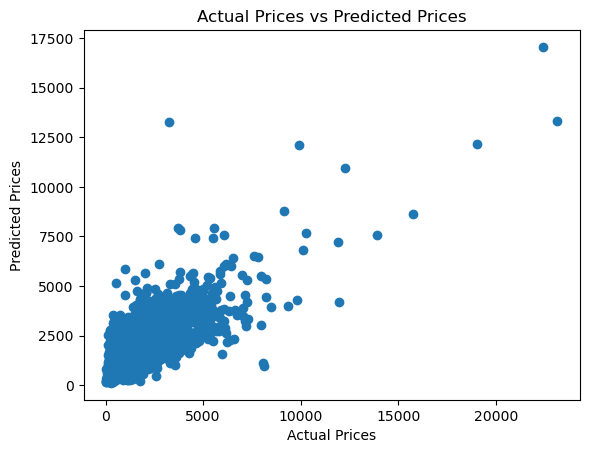

In [80]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()